<a href="https://colab.research.google.com/github/Monisha-18/CNN_Covid/blob/main/CNN_Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import LeakyReLU

In [ ]:
import numpy as np

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(34,(5,5),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(108,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(15,activation='relu'))

#output layer
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adadelta',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.4,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/covid_data_updated/covid_data_updated/Train',target_size=(64,64),batch_size=8,class_mode='binary')
test_set=test_datagen.flow_from_directory('/content/drive/MyDrive/covid_data_updated/covid_data_updated/test',target_size=(64,64),batch_size=8,class_mode='binary')

Found 238 images belonging to 2 classes.
Found 39 images belonging to 2 classes.


In [ ]:
#fit model
model.fit(training_set,steps_per_epoch=20,epochs=10)

Epoch 1/10
20/20 [==============================] - 32s 2s/step - loss: 0.6940 - accuracy: 0.5316
Epoch 2/10
20/20 [==============================] - 11s 545ms/step - loss: 0.6910 - accuracy: 0.5316
Epoch 3/10
20/20 [==============================] - 5s 241ms/step - loss: 0.6849 - accuracy: 0.5696
Epoch 4/10
20/20 [==============================] - 2s 114ms/step - loss: 0.6841 - accuracy: 0.5506
Epoch 5/10
20/20 [==============================] - 4s 177ms/step - loss: 0.6884 - accuracy: 0.5190
Epoch 6/10
20/20 [==============================] - 2s 102ms/step - loss: 0.6869 - accuracy: 0.5253
Epoch 7/10
20/20 [==============================] - 2s 103ms/step - loss: 0.6857 - accuracy: 0.5312
Epoch 8/10
20/20 [==============================] - 2s 104ms/step - loss: 0.6779 - accuracy: 0.5750
Epoch 9/10
20/20 [==============================] - 3s 125ms/step - loss: 0.6811 - accuracy: 0.5437
Epoch 10/10
20/20 [==============================] - 3s 169ms/step - loss: 0.6890 - accuracy: 0.5125


In [ ]:
test_loss,test_acc=model.evaluate(test_set,verbose=2)

print("\n\n")
print("Test loss: \t",test_loss,"\n")
print("Test accuracy: \t",test_acc,"\n")

5/5 - 11s - loss: 0.6571 - accuracy: 0.7692 - 11s/epoch - 2s/step



Test loss: 	 0.6570993661880493 

Test accuracy: 	 0.7692307829856873 



In [ ]:
import tensorflow as tf
resnet_model=Sequential()
pretrained_model=tf.keras.applications.ResNet50(include_top=False,input_shape=(64,64,3),pooling='avg',classes=2,weights='imagenet')
for layer in pretrained_model.layers:
  layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(200,activation='relu'))
resnet_model.add(Dense(1,activation='sigmoid'))

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet_model.compile(optimizer='adadelta',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#fit model
resnet_model.fit(training_set,steps_per_epoch=20,epochs=10)

Epoch 1/10
20/20 [==============================] - 8s 181ms/step - loss: 0.7274 - accuracy: 0.5125
Epoch 2/10
20/20 [==============================] - 5s 240ms/step - loss: 0.7186 - accuracy: 0.5250
Epoch 3/10
20/20 [==============================] - 3s 157ms/step - loss: 0.7170 - accuracy: 0.5253
Epoch 4/10
20/20 [==============================] - 3s 156ms/step - loss: 0.7208 - accuracy: 0.5190
Epoch 5/10
20/20 [==============================] - 4s 171ms/step - loss: 0.6889 - accuracy: 0.5759
Epoch 6/10
20/20 [==============================] - 4s 180ms/step - loss: 0.7210 - accuracy: 0.5125
Epoch 7/10
20/20 [==============================] - 3s 157ms/step - loss: 0.6929 - accuracy: 0.5625
Epoch 8/10
20/20 [==============================] - 3s 165ms/step - loss: 0.7077 - accuracy: 0.5316
Epoch 9/10
20/20 [==============================] - 4s 181ms/step - loss: 0.7028 - accuracy: 0.5443
Epoch 10/10
20/20 [==============================] - 3s 154ms/step - loss: 0.7234 - accuracy: 0.5000

In [ ]:
test_loss,test_acc=resnet_model.evaluate(test_set,verbose=2)

print("\n\n")
print("Test loss: \t",test_loss,"\n")
print("Test accuracy: \t",test_acc,"\n")

5/5 - 2s - loss: 0.5853 - accuracy: 0.7692 - 2s/epoch - 350ms/step



Test loss: 	 0.5852981805801392 

Test accuracy: 	 0.7692307829856873 



In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

vgg_model=Sequential()
base_model=VGG16(include_top=False,input_shape=(64,64,3),pooling='avg',classes=2,weights='imagenet')
layer.trainable=False
vgg_model.add(base_model)

vgg_model.add(Flatten())
vgg_model.add(Dense(512,activation='relu'))
vgg_model.add(Dense(1,activation='sigmoid'))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg_model.compile(optimizer='adadelta',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#fit model
vgg_model.fit(training_set,steps_per_epoch=20,epochs=10)

Epoch 1/10
20/20 [==============================] - 40s 2s/step - loss: 0.6692 - accuracy: 0.5938
Epoch 2/10
20/20 [==============================] - 29s 1s/step - loss: 0.6144 - accuracy: 0.6962
Epoch 3/10
20/20 [==============================] - 29s 1s/step - loss: 0.5712 - accuracy: 0.7595
Epoch 4/10
20/20 [==============================] - 29s 1s/step - loss: 0.5247 - accuracy: 0.7911
Epoch 5/10
20/20 [==============================] - 29s 1s/step - loss: 0.4726 - accuracy: 0.8500
Epoch 6/10
20/20 [==============================] - 44s 2s/step - loss: 0.3806 - accuracy: 0.9430
Epoch 7/10
20/20 [==============================] - 29s 1s/step - loss: 0.3797 - accuracy: 0.8861
Epoch 8/10
20/20 [==============================] - 32s 2s/step - loss: 0.2864 - accuracy: 0.9494
Epoch 9/10
20/20 [==============================] - 31s 2s/step - loss: 0.2165 - accuracy: 0.9873
Epoch 10/10
20/20 [==============================] - 37s 2s/step - loss: 0.1788 - accuracy: 0.9500


In [ ]:
test_loss,test_acc=vgg_model.evaluate(test_set,verbose=2)

print("\n\n")
print("Test loss: \t",test_loss,"\n")
print("Test accuracy: \t",test_acc,"\n")

5/5 - 2s - loss: 2.1523 - accuracy: 0.0769 - 2s/epoch - 386ms/step



Test loss: 	 2.152334451675415 

Test accuracy: 	 0.07692307978868484 



In [ ]:
!pip install lime
import lime
from lime import lime_image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=137144b9cde3f0c885eb8e93046988f5b80b74f7c8ce198afde871a84075a844
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
print(type(test_set))
tmp1,tmp2=next(test_set)
print(tmp1.shape)
print(tmp2.shape)

<class 'keras.src.preprocessing.image.DirectoryIterator'>
(8, 64, 64, 3)
(8,)


In [ ]:
!pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 6.3 MB/s eta 0:00:00


In [ ]:
tmp1,tmp2=next(test_set)
background=shap.utils.sample(tmp1,5)
explainer=shap.DeepExplainer(model,background)

/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")


In [ ]:
sample_index=np.random.randint(0,background.shape[0])
sample_image=background[sample_index]

In [ ]:
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(background[sample_index].astype('double'), model.predict, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 58ms/step


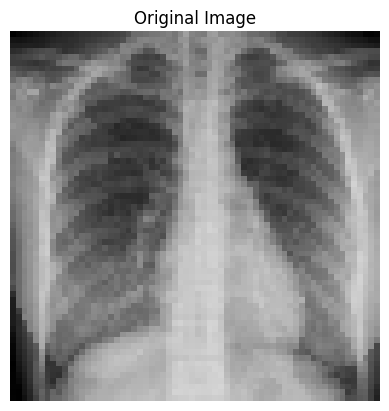

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(background[sample_index])
plt.title('Original Image')
plt.axis('off')
plt.show()

In [ ]:
!pip install lime shap
import shap
from skimage.segmentation import mark_boundaries

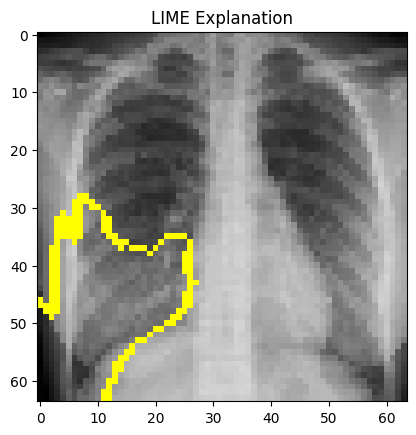

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))
plt.title("LIME Explanation")
plt.show()

In [ ]:
sample_image_batch = np.expand_dims(sample_image, axis=0)  # Add batch dimension
shap_values = explainer.shap_values(sample_image_batch)
sampled_images_array_scaled = sample_image_batch * 255
sampled_images_array_scaled = sampled_images_array_scaled.astype(np.uint8)

shap.image_plot(shap_values,sampled_images_array_scaled)
print(sampled_images_array_scaled.shape)
print(np.min(shap_values))
print(np.max(shap_values))

AttributeError: 'LimeImageExplainer' object has no attribute 'shap_values'